## Variable interactions

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trainf = pd.read_csv('./Datasets/Car_features_train.csv')
trainp = pd.read_csv('./Datasets/Car_prices_train.csv')
testf = pd.read_csv('./Datasets/Car_features_test.csv')
testp = pd.read_csv('./Datasets/Car_prices_test.csv')
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


Until now, we have have assumed that the association between a predictor $X_j$ and response $Y$ does not depend on the value of other predictors. For example, the muliple linear regression model that we developed in Chapter [2](https://nustat.github.io/STAT303-2-class-notes/Lec2_MultipleLinearRegression.html) assumes that the average increase in price associated with a unit increase in engineSize is always $12,180, regardless of the value of other predictors. However, this assumption may be incorrect.

### Variable interaction between continuous predictors

We can relax this assumption by considering another predictor, called an interaction term. Let us assume that the average increase in `price` associated with a one-unit increase in `engineSize` depends on the model `year` of the car. In other words, there is an interaction between `engineSize` and `year`. This interaction can be included as a predictor, which is the product of `engineSize` and `year`. *Note that there are several possible interactions that we can consider. Here the interaction between `engineSize` and `year` is just an example.*

In [4]:
#Considering interaction between engineSize and year
ols_object = smf.ols(formula = 'price~year*engineSize+mileage+mpg', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2121.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        02:19:05   Log-Likelihood:                -52338.
No. Observations:                4960   AIC:                         1.047e+05
Df Residuals:                    4954   BIC:                         1.047e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.606e+05   2.74e+05      2.048      0.041     2.4e+04     1.1e+06
year             -275.3833    135.695     -2.029      0.042    -541.405      -9.361
engineSize      -1.796e+06   9.97e+04    -18.019      0.000   -1.99e+06    -1.6e+06
year:engineSize   896.7687     49.431     18.142      0.000     799.861     993.676
mileage            -0.1525      0.008    -17.954      0.000      -0.169      -0.136
mpg               -84.3417      9.048     -9.322      0.000    -102.079     -66.604
==============================================================================
Omnibus:                     2330.413   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29977.437
Skew:                           1.908   Prob(JB):                         0.00
Kurtosis:                      14.423   Cond. No.                     7.66e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the R-squared has increased as compared to the model in Chapter [2](https://nustat.github.io/STAT303-2-class-notes/Lec2_MultipleLinearRegression.html) since we added a predictor.

The model equation is:

\begin{equation}
price = \beta_0 + \beta_1*year + \beta_2*engineSize + \beta_3*(year*engineSize) + \beta4*mileage + \beta_5*mpg,
\end{equation}or

\begin{equation}
price = \beta_0 + \beta_1*year + (\beta_2+\beta_3*year)*engineSize + \beta4*mileage + \beta_5*mpg,
\end{equation}or

\begin{equation}
price = \beta_0 + \beta_1*year + \tilde \beta*engineSize + \beta4*mileage + \beta_5*mpg,
\end{equation}

Since $\tilde \beta$ is a function of `year`, the association between `engineSize` and `price` is no longer a constant. A change in the value of `year` will change the association between `price` and `engineSize`.

Substituting the values of the coefficients:
\begin{equation}
price = 5.606e5 - 275.3833*year + (-1.796e6+896.7687*year)*engineSize -0.1525*mileage -84.3417*mpg
\end{equation}

Thus, for cars launched in the year 2010, the average increase in price for one liter increase in engine size is -1.796e6 + 896.7687 * 2010 $\approx$ \\$6,500, assuming all the other predictors are constant. However, for cars launched in the year 2020, the average increase in price for one liter increase in engine size is -1.796e6 + 896.7687*2020 $\approx$ \\$15,500 , assuming all the other predictors are constant.

Similarly, the equation can be re-arranged as:
\begin{equation}
price = 5.606e5 +(-275.3833+896.7687*engineSize)*year -1.796e6*engineSize -0.1525*mileage -84.3417*mpg
\end{equation}

Thus, for cars with an engine size of 2 litres, the average increase in price for a one year newer model is -275.3833+896.7687 * 2 $\approx$ \\$1500, assuming all the other predictors are constant. However, for cars with an engine size of 3 litres, the average increase in price for a one year newer model is -275.3833+896.7687 * 3 $\approx$ \\$2400, assuming all the other predictors are constant.

In [5]:
#Computing the RMSE of the model with the interaction term
pred_price = model.predict(testf)
np.sqrt(((testp.price - pred_price)**2).mean())

9423.598872501092

Note that the RMSE reduced as compared to that of the model in Chapter [2](https://nustat.github.io/STAT303-2-class-notes/Lec2_MultipleLinearRegression.html). This is because the interaction term between `engineSize` and `year` is significant and relaxes the assumption of constant association between price and engine size, and between price and year. This added flexibility makes the model better fit the data. Caution: Too much flexibility may lead to overfitting!

Note that interaction terms corresponding to other variable pairs, and higher order interaction terms (such as those containing 3 or 4 variables) may also be significant and improve the model fit & thereby the prediction accuracy of the model.

### Including qualitative predictors in the model

Let us develop a model for predicting *price* based on *engineSize* and the qualitative predictor *transmission*.

In [7]:
#checking the distribution of values of transmission
train.transmission.value_counts()

Manual       1948
Automatic    1660
Semi-Auto    1351
Other           1
Name: transmission, dtype: int64

Note that the *Other* category of the variable *transmission* contains only a single observation, which is likely to be insufficient to train the model. We'll remove that observation from the training data. Another option may be to combine the observation in the *Other* category with the nearest category, and keep it in the data.

In [8]:
train_updated = train[train.transmission!='Other']

In [9]:
ols_object = smf.ols(formula = 'price~engineSize+transmission', data = train_updated)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1400.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:32:36   Log-Likelihood:                -53644.
No. Observations:                4959   AIC:                         1.073e+05
Df Residuals:                    4955   BIC:                         1.073e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3042.6765    661.190      4.602      0.000    1746.451    4338.902
transmission[T.Manual]    -6770.6165    442.116    -15.314      0.000   -7637.360   -5903.873
transmission[T.Semi-Auto]  4994.3112    442.989     11.274      0.000    4125.857    5862.765
engineSize                 1.023e+04    247.485     41.323      0.000    9741.581    1.07e+04
==============================================================================
Omnibus:                     1575.518   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11006.609
Skew:                           1.334   Prob(JB):                         0.00
Kurtosis:                       9.793   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model equation is:

Automatic transmission: $price = 3042.6765 + 1.023e4 * engineSize$, \
Semi-Automatic transmission: $price = 3042.6765 + 1.023e4 * engineSize + 4994.3112$, \
Manual transmission: $price = 3042.6765 + 1.023e4 * engineSize -6770.6165$

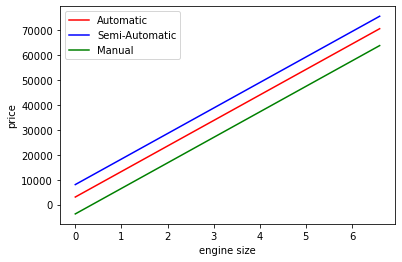

In [10]:
#Visualizing the developed model
x = np.linspace(-train.engineSize.min(),train.engineSize.max(),100)
plt.plot(x, model.params['engineSize']*x+model.params['Intercept'], '-r', label='Automatic')
plt.plot(x, model.params['engineSize']*x+model.params['Intercept']+model.params['transmission[T.Semi-Auto]'], '-b', label='Semi-Automatic')
plt.plot(x, model.params['engineSize']*x+model.params['Intercept']+model.params['transmission[T.Manual]'], '-g', label='Manual')
plt.legend(loc='upper left')
plt.xlabel('engine size')
plt.ylabel('price')
plt.show()